In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('preprocessed_dataset_china.csv') 
print(df)

         date_and_time     PM2.5        O3  TEMPERATURE  PRESSURE  DEWPOINT  \
0        3/1/2013 0:00  0.006024  0.172689     0.297909  0.646749  0.255486   
1        3/1/2013 1:00  0.008032  0.183869     0.290941  0.655536  0.250784   
2        3/1/2013 2:00  0.005020  0.164304     0.282230  0.659051  0.244514   
3        3/1/2013 4:00  0.005020  0.100020     0.277003  0.685413  0.213166   
4        3/1/2013 5:00  0.007028  0.178279     0.264808  0.695958  0.222571   
...                ...       ...       ...          ...       ...       ...   
33658  2/28/2017 19:00  0.008032  0.200639     0.510453  0.499121  0.299373   
33659  2/28/2017 20:00  0.010040  0.139150     0.494774  0.500879  0.316614   
33660  2/28/2017 21:00  0.011044  0.150330     0.480836  0.511424  0.344828   
33661  2/28/2017 22:00  0.009036  0.164304     0.475610  0.514938  0.351097   
33662  2/28/2017 23:00  0.010040  0.136355     0.442509  0.509666  0.304075   

       RAIN  
0       0.0  
1       0.0  
2       0

In [5]:
# from datetime import datetime
# def parse(x):
#     return datetime.strptime(x, '%Y %m %d %H')

# df = pd.read_csv('preprocessed_dataset_china.csv',index_col=0,date_parser=parse,parse_dates=[['year', 'month', 'day', 'hour']])                            

# df.head()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33663 entries, 0 to 33662
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date_and_time  33663 non-null  object 
 1   PM2.5          33663 non-null  float64
 2   O3             33663 non-null  float64
 3   TEMPERATURE    33663 non-null  float64
 4   PRESSURE       33663 non-null  float64
 5   DEWPOINT       33663 non-null  float64
 6   RAIN           33663 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.8+ MB


In [7]:
df.head()

,date_and_time,PM2.5,O3,TEMPERATURE,PRESSURE,DEWPOINT,RAIN
0,3/1/2013 0:00,0.006024,0.172689,0.297909,0.646749,0.255486,0.0
1,3/1/2013 1:00,0.008032,0.183869,0.290941,0.655536,0.250784,0.0
2,3/1/2013 2:00,0.005020,0.164304,0.282230,0.659051,0.244514,0.0
3,3/1/2013 4:00,0.005020,0.100020,0.277003,0.685413,0.213166,0.0
4,3/1/2013 5:00,0.007028,0.178279,0.264808,0.695958,0.222571,0.0


In [8]:
print(df.shape)

(33663, 7)


In [9]:
print(df.describe())

              PM2.5            O3   TEMPERATURE      PRESSURE      DEWPOINT  \
count  33663.000000  33663.000000  33663.000000  33663.000000  33663.000000   
mean       0.081787      0.156106      0.533666      0.463514      0.595715   
std        0.086078      0.159436      0.198664      0.186095      0.216007   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.019076      0.021761      0.351916      0.311072      0.418495   
50%        0.056225      0.116790      0.552265      0.453427      0.606583   
75%        0.112450      0.228589      0.703833      0.613357      0.793103   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

               RAIN  
count  33663.000000  
mean       0.001377  
std        0.016916  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  


In [10]:
df.isnull().sum()

date_and_time    0
PM2.5            0
O3               0
TEMPERATURE      0
PRESSURE         0
DEWPOINT         0
RAIN             0
dtype: int64

In [11]:
print(df.columns)

Index(['date_and_time', 'PM2.5', 'O3', 'TEMPERATURE', 'PRESSURE', 'DEWPOINT',
       'RAIN'],
      dtype='object')


In [12]:
df = df.dropna()

In [13]:
df.isnull().sum()

date_and_time    0
PM2.5            0
O3               0
TEMPERATURE      0
PRESSURE         0
DEWPOINT         0
RAIN             0
dtype: int64

In [14]:
import numpy as np

mean_pm = df['PM2.5'].mean()
std_pm = df['PM2.5'].std()
z_scores = (df['PM2.5'] - mean_pm) / std_pm

threshold = 3
df = df[np.abs(z_scores) < threshold]

In [15]:
features = [ 'O3', 'TEMPERATURE', 'PRESSURE', 'DEWPOINT', 'RAIN']
target = ['PM2.5']

In [16]:
X = df[features].values
y = df[target].values

In [17]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
timesteps = 24

In [19]:
def create_sliding_window(data, labels, timesteps):
    X, y = [], []
    for i in range(len(data) - timesteps):
        X.append(data[i:i+timesteps])
        y.append(labels[i+timesteps])
    return np.array(X), np.array(y)

In [20]:
X, y = create_sliding_window(X_scaled, y, timesteps)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (26412, 24, 5)
X_test shape: (6604, 24, 5)


In [24]:
# def build_transformer_model(input_shape, head_size, num_heads, ff_dim, num_layers, dropout=0.2):
#     inputs = tf.keras.Input(shape=input_shape)
#     x = inputs

#     for _ in range(num_layers):
#         # Multi-head attention
#         x = tf.keras.layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
#         x = tf.keras.layers.Dropout(dropout)(x)
#         x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(x)

#         # Feed-forward network
#         x_ff = tf.keras.layers.Dense(ff_dim, activation="relu")(x)
#         x_ff = tf.keras.layers.Dropout(dropout)(x_ff)
#         x_ff = tf.keras.layers.Dense(input_shape[-1])(x_ff)

#         # Residual connection
#         x = tf.keras.layers.Add()([x, x_ff])
#         x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(x)

#     # Global average pooling and output layer
#     x = tf.keras.layers.GlobalAveragePooling1D()(x)
#     outputs = tf.keras.layers.Dense(1, activation="linear")(x)

#     return tf.keras.Model(inputs, outputs)

In [38]:
import tensorflow as tf
import numpy as np

# Positional Encoding Layer
class PositionalEncoding(Layer):
    def __init__(self, max_seq_len, d_model):
        super(PositionalEncoding, self).__init__()
        self.max_seq_len = max_seq_len
        self.d_model = d_model

    def build(self, input_shape):
        # Create a learnable positional encoding matrix with matching dimensions
        pos = np.arange(self.max_seq_len)[:, np.newaxis]  # Shape: [max_seq_len, 1]
        i = np.arange(self.d_model)[np.newaxis, :]  # Shape: [1, d_model]
        angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(self.d_model))  # Shape: [1, d_model]
        pos_enc = pos * angle_rates  # Shape: [max_seq_len, d_model]
        pos_enc[:, 0::2] = np.sin(pos_enc[:, 0::2])  # Apply sin to even indices
        pos_enc[:, 1::2] = np.cos(pos_enc[:, 1::2])  # Apply cos to odd indices
        self.pos_enc = tf.constant(pos_enc, dtype=tf.float32)

    def call(self, inputs):
        return inputs + self.pos_enc[:tf.shape(inputs)[1], :]

def build_transformer_model(input_shape, head_size=64, num_heads=4, ff_dim=512, num_layers=6, dropout=0.2, learning_rate=1e-4):
    inputs = tf.keras.Input(shape=input_shape)
    x = inputs

    # Convolutional layer to extract local patterns
    x = tf.keras.layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu')(x)
    x = tf.keras.layers.Dropout(dropout)(x)
    
    # Add Positional Encoding Layer
    seq_length = input_shape[0]  # Sequence length (first dimension)
    x = PositionalEncoding(seq_length, input_shape[-1])(x)

    for _ in range(num_layers):
        # Multi-head attention layer
        x = tf.keras.layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
        x = tf.keras.layers.Dropout(dropout)(x)
        x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(x)

        # Feed-forward network with GELU activation
        x_ff = tf.keras.layers.Dense(ff_dim, activation="gelu")(x)
        x_ff = tf.keras.layers.Dropout(dropout)(x_ff)
        x_ff = tf.keras.layers.Dense(input_shape[-1])(x_ff)

        # Residual connection
        x = tf.keras.layers.Add()([x, x_ff])
        x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(x)

    # Global average pooling and output layer
    x = tf.keras.layers.GlobalAveragePooling1D()(x)
    outputs = tf.keras.layers.Dense(1, activation="linear")(x)

    # Compile the model with AdamW optimizer
    optimizer = tf.keras.optimizers.AdamW(learning_rate=learning_rate)
    model = tf.keras.Model(inputs, outputs)
    model.compile(optimizer=optimizer, loss='mse')

    return model


In [39]:
input_shape = (X_train.shape[1], X_train.shape[2])  # (timesteps, features)
head_size = 64  # Attention head size
num_heads = 4   # Number of attention heads
ff_dim = 128    # Feed-forward layer size
num_layers = 2  # Number of Transformer blocks
dropout = 0.2   # Dropout rate

In [40]:
transformer_model = build_transformer_model(input_shape, head_size, num_heads, ff_dim, num_layers, dropout)
transformer_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

ValueError: Exception encountered when calling layer "positional_encoding_5" (type PositionalEncoding).

in user code:

    File "C:\Users\Dell\AppData\Local\Temp\ipykernel_17420\492790621.py", line 22, in call  *
        return inputs + self.pos_enc[:tf.shape(inputs)[1], :]

    ValueError: Dimensions must be equal, but are 64 and 5 for '{{node positional_encoding_5/add}} = AddV2[T=DT_FLOAT](Placeholder, positional_encoding_5/strided_slice_1)' with input shapes: [?,24,64], [24,5].


Call arguments received by layer "positional_encoding_5" (type PositionalEncoding):
  • inputs=tf.Tensor(shape=(None, 24, 64), dtype=float32)

In [27]:
transformer_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 24, 5)]              0         []                            
                                                                                                  
 multi_head_attention (Mult  (None, 24, 5)                5893      ['input_1[0][0]',             
 iHeadAttention)                                                     'input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 24, 5)                0         ['multi_head_attention[0][0]']
                                                                                                  
 layer_normalization (Layer  (None, 24, 5)                10        ['dropout[0][0]']         

In [28]:
history = transformer_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=8,
    verbose=1
)

Epoch 1/50
3302/3302 [==============================] - 62s 18ms/step - loss: 6776.9106 - mae: 58.5813 - val_loss: 5045.2002 - val_mae: 54.9389
Epoch 2/50
3302/3302 [==============================] - 64s 19ms/step - loss: 4950.2578 - mae: 54.8529 - val_loss: 5038.0815 - val_mae: 55.3870
Epoch 3/50
3302/3302 [==============================] - 75s 23ms/step - loss: 4722.6802 - mae: 52.9526 - val_loss: 4587.0332 - val_mae: 52.7431
Epoch 4/50
3302/3302 [==============================] - 45s 14ms/step - loss: 4094.8958 - mae: 49.0431 - val_loss: 3794.6260 - val_mae: 44.0758
Epoch 5/50
3302/3302 [==============================] - 49s 15ms/step - loss: 3687.5808 - mae: 46.6610 - val_loss: 3497.6282 - val_mae: 43.7056
Epoch 6/50
3302/3302 [==============================] - 44s 13ms/step - loss: 3444.3633 - mae: 44.9094 - val_loss: 3300.6599 - val_mae: 43.2357
Epoch 7/50
3302/3302 [==============================] - 40s 12ms/step - loss: 3378.5623 - mae: 44.4634 - val_loss: 3257.3132 - val_mae: 

In [29]:
y_pred = transformer_model.predict(X_test)
for i in range(5):
    print(y_pred[i])

207/207 [==============================] - 3s 13ms/step
[129.4919]
[116.705284]
[50.83727]
[92.000786]
[118.33112]


In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

RMSE: 53.84197468888113
MAE: 39.39579237435963
R²: 0.4245496322337837


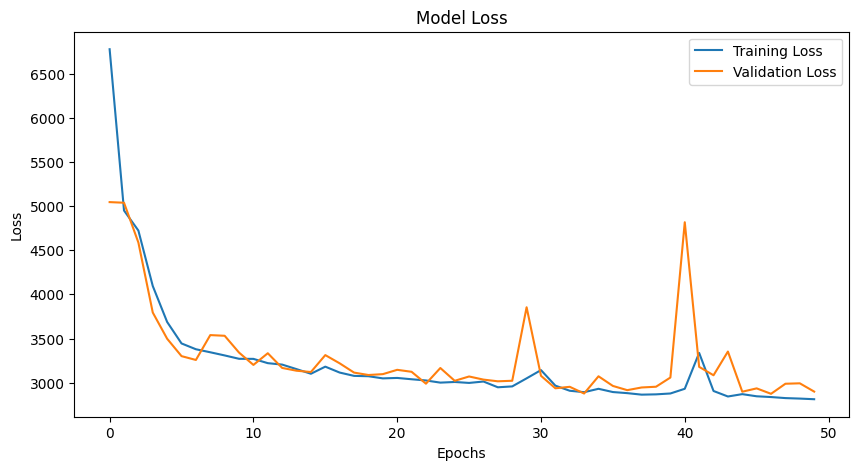

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

207/207 [==============================] - 3s 14ms/step


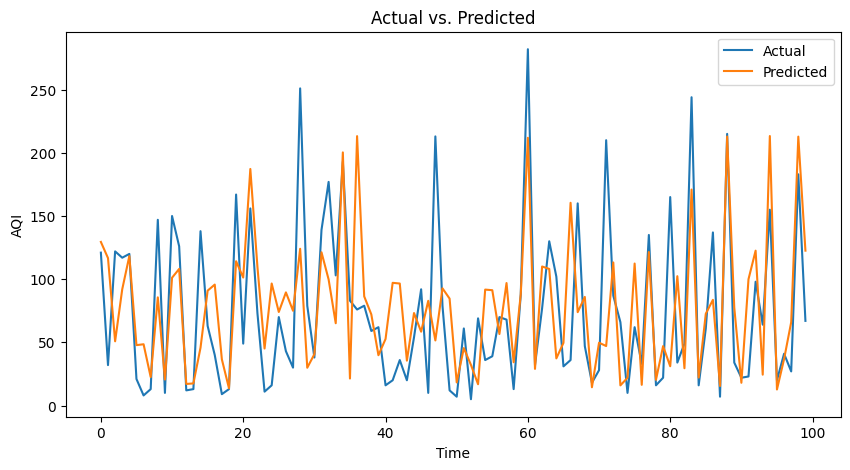

In [32]:
y_pred = transformer_model.predict(X_test)

# Visualize actual vs. predicted
plt.figure(figsize=(10, 5))
plt.plot(y_test[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.title('Actual vs. Predicted')
plt.xlabel('Time')
plt.ylabel('AQI')
plt.legend()
plt.show()